# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [4]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**

Smartcab does not move during the simulation. It stays on the same position all the time.

Smartcab gets both positive and negative rewards, depending on situation.

Smartcab gets positive rewards while it's on the red light, but when the green light appears, it receives negative rewards because there is no movement of the car. This process repeats, so the reward score changes from positive to negative and vice versa during the simulation process.


### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In agent.py file, I have chosen following three flags:

learning - default is set to false, which means the agent is not expected to learn using Q-learning algorithm. With this flag being set to false, the agent will not change behavior during the simulation. This flag is affected by epsilon and alpha parameters which represent exploration factor and learning rate, respectively. 

enforce_deadline - this flag ensures that the agent is evaluated based on deadline metric. On default, this flag is set to false, which means our agent has no need to deal with deadlines.

num_dummies - this flag indicates number of dummy agents in environment. Default value is set to 100. Changing the value of a flag will affect the overall score of a simulation. With less traffic, there would be a lower probabillity of accident and vice versa.


In the environment.py Python file, the act() function is the one invoked, when agent performs an action.

In the simulator.py Python file, both functions are doing the same process, to display status of each step during the simulation process, but the way they perform it, actually differs. 'render_text()' displays current state in text format, while 'render()' function display state using GUI and PyGame module.

In the planner.py Python file, next_waypoint() East-West direction will be considered first and then North-South direction.


-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'Left'` (turn left), `'Right'` (turn right), or `'Forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


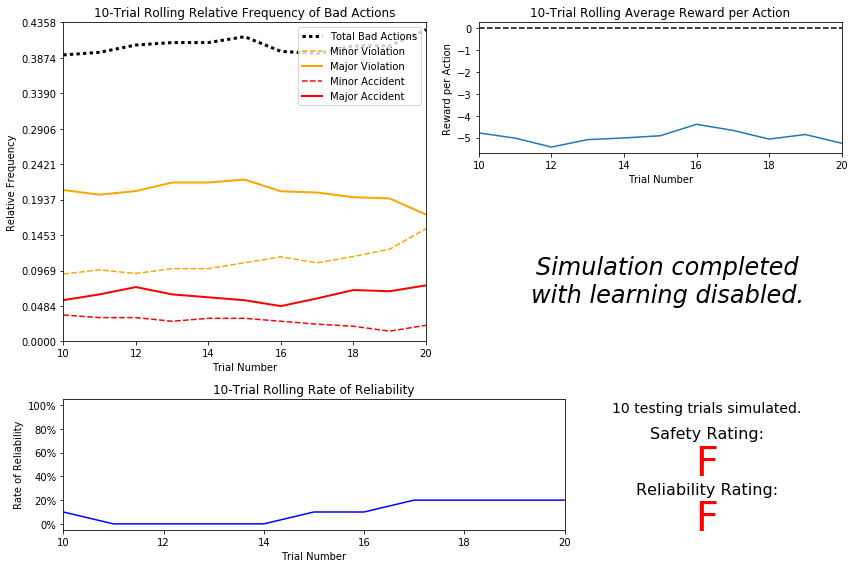

In [5]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliabilty make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**

Driving agent was making bad decisions around 38% of the time at the beginning, resulting in around 43% bad decisions of the time at the end of simulation. At the beginning, bad decisions caused around 5% of major accidents and around 4.5% minor accidents resulting around 7% of major and around 3% of minor accidents at the end of simulation.

Considering that agent is not learning in this simulation, rate of reliability does make sense, because rate of realibility is around 20% all the time, which means the agent is late at least 80% of the time, on average.

It seems that agent reward is gradually growing up to 16th iteration of simulation (from around -5 to -4), but from that point, reward seems to drop significantly below -3. From the graph we see that agent is not heavily penalized, since we have a random reward system and we do not notice major fluctuations in reward per action graph over time.

As the number of trials increases, the outcome improvement of results does not change significantly, in order to recieve grade higher than F, both for safety and reliability. We see that total bad actions happen from 38%-43.5% of the time, major violation happens from 20%-16% of the time, minor violation from 9.6% to 18%, minor accidents from 3%-2% and major accidents from 4.8% to 7% of the time.

At this stage, we cannot consider this smart cab as reliable nor safe for driving. As explained in previous questions, this smartcab makes random actions resulting in accidents, around 80%-90% latency, from 3%-2% in minor accidents, from 4.8% to 7% in major accidents, from 20%-16% in major violation and 9.6% to 18% in minor violation.


-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate?*

**Answer:**

For both safety and reliability, following features are considered as important:

waypoint - the smartcab needs to know the waypoint in order to move to direction for defined destination. 

light - an extremely important safety feature, which affects safety (accidents and violation) if smartcab crosses on red light. Of course, it will be penalized with negative reward, if smartcab is idle on a green light.

left - important feature in case when the light is red and smartcap can turn right. In that case we should consider the direction of the vehicle on the left, if it goes forwart, it might cause an accident, so this feature is important for safety.

oncoming - the smartcab needs to know if oncoming vehicle is intended to turn left on the road, in order to avoid violation and accident on the road.


Following features I considered as not so relevant for safety and efficiency:

right - it clearly does not matter for the smartcab to know direction of vehicle on the right, regardless the traffic light. For example, on the red light, smartcab can turn right, which is not affected by the car on the right, because it is on the separate lane in the traffic. On the other hand, when the light is green, smartcab can go forward without considering the direction of the vehicle on the right, as long as that vehicle respects laws of traffic (it may turn right, but first it needs to pass the smartcab).

deadline - for the safety reasons, deadline is not considered as relevant feature for safety, when it is not used. Forcing the deadline might be a challenge for learning, because it might cause higher probability for minor violations or even accidents, if the deadline is being forced during the training.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the evironment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:**

We have selected following features for defining combinations for agent to learn.

waypoint:         3 states (forward, left, right)

input - light:    2 states (reg, green)

input - left:     4 states (forward, left, right, none)

input - oncoming: 4 states (forward, left, right, none)

possible action:  4 states (forward, left, right, none)


In total, there are 3x2x4x4x4=384 combinations, including possible actions and states, which is not a large number for agent to learn the policy for each combination of states and actions.


### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the interative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.01). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

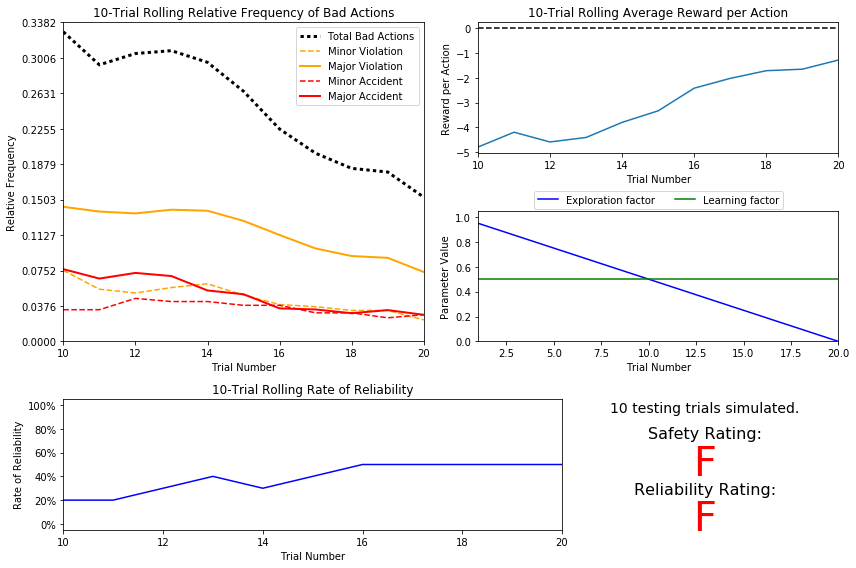

In [12]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
- *How does the safety and reliability rating compare to the initial driving agent?*

**Answer:**

**Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?**

Comparing default Q-learning agent and basic driving agent, we see a siginificant improvment.

Below is listed comparison between basic driving agent and Q-learning agent respectively:


bad actions happen from 38%-43.5% comparing to 33.8%-15%

major violation happens from 20%-16% comparing to 15%-7.5%

minor violation from 9.6%-18%, comparing to 7.5%-2%

minor accidents from 3%-2% and, comparing to 3.7%-2%

major accidents from 4.8% to 7%, comparing to 7.5%-2%.

We may conclude that significant improvement was made, regarding bad actions, major violation minor violation and major accidents.
Regarding minor accidents, we cannot see a siginificant improvement.
Comparing rate of reliability, we see significant improvement from 20% to 50% on average.
Comparing average reward per action, we also see a significant improvement from -5.5 to -1.5, considering last trial number (20).



**Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?**

20 training trials agent required before testing. This number does make sense considering given epsilon-tolerance, because we have determined decrement value of 0.05 and the initial value of epsilon=1. At the end of training process, epsilon tolerance value is 0, because 1-20x0.05=0, which is < 0.05.



**Is the decaying function you implemented for  ϵϵ  (the exploration factor) accurately represented in the parameters panel?**

The exploration factor seems to be accurately represented in the parameters panel.



**As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?**

With number of training trials increased, number of bad actions dropped from 33.8% to 15%. The average reward increased from -4.8 to -1.5.



**How does the safety and reliability rating compare to the initial driving agent?**

Both safety and reliability remained the same mark as in previous simulation, on F, regardless the improved scores explained before.


-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the impliciations it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

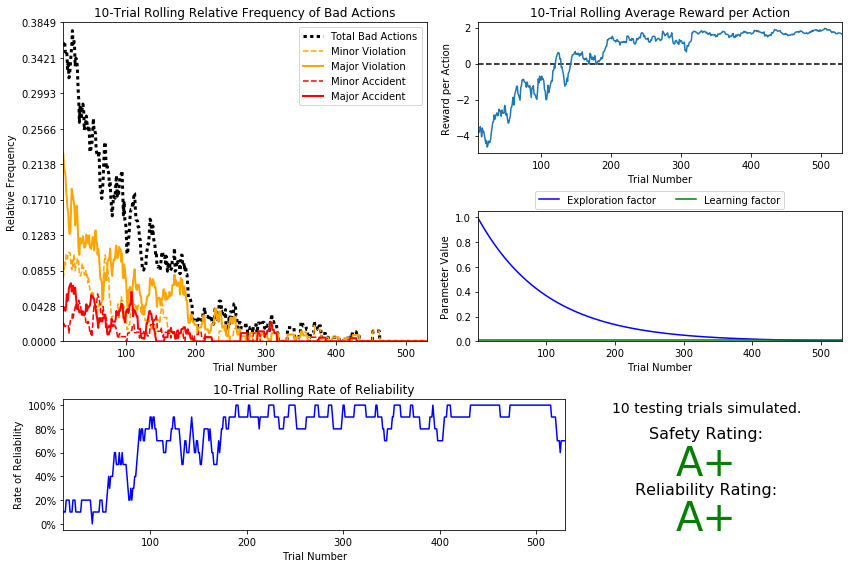

In [32]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*
- *Approximately how many training trials were needed for your agent before begining testing?*
- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*
- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?*
- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*
- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**Answer:**


**What decaying function was used for epsilon (the exploration factor)?**

The exploration factor that was used is "math.exp(self.alpha x self.t x (-1.0))", with alpha set to 0.01, after several attempts.



**Approximately how many training trials were needed for your agent before begining testing?**

Approximately, there were around 550 training trials before testing begun. This actually makes sense, according to tolerance treshold being set to 0.005, because 1/math.exp(0.01 x 550) = 0.00408677143 < 0.005.



**What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?**

I have used tolerance=0.005 and alpha=0.01. I intended to use lower value for tolerance in order to gain more training trials until Q-learning algorithm reaches tolerance treshold. Generally, setting alpha to 0 causes Q table not to update itself, and setting it to value close to 1 makes agent to learn quicker. The value of alpha vas set to smaller value in order for agent to learn more slowly.



**How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?**

There is a huge improvement that was made comparing the optimized solution to previous, default one. 

Below is listed comparison between optimized driving agent and previous agent respectively:

bad actions happen from 37%-appx. 0%, comparing to 33.8%-15%

major violation happens from 22%-appx. 0%, comparing to 15%-7.5%

minor violation from 9%-appx. 0%, comparing to 7.5%-2%

minor accidents from 2%-appx. 0%, comparing to 3.7%-2%

major accidents from 4%-appx. 0%, comparing to 7.5%-2%


We may notice improvement in all aspects. Also, at the end of training process, smart cab earned positive reward score, somewhere near 2, on average, comparing to preious solution, where our agent had negative reward score at the end.
Also, rate of reliability have dramatically increased during training trials, comparing to previous solution.
And the agent received both A+ ratings for safety and reliability as well!



**Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?**

Since the agent have received A+ ratings both for reliability and safety, comparing to F marks for the previous agent, I can say results clearly show that the agent have successfully learned the appropriate policy.



**Are you satisfied with the safety and reliability ratings of the Smartcab?**

Considering results obtained with all parameters used during training and testing process, I am satisfied.


### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8
Provide a few examples (using the states you've defined) of what an optimal policy for this problem would look like. Afterwards, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ Provide an example of a state and all state-action rewards recorded, and explain why it is the correct policy.

**Answer:** 

For this example, for correct policy, I would use cases when the agent is on the red light and moving forward, without oncoming traffic.

The policy is as follows:

state: {'forward', 'red', 'None', 'None'}

action: None -> policy: optimal

action: forward -> policy: incorrect

action: right -> policy: suboptimal


For this state, I have found policy from the 'sim_improved-learning.txt' file.


{'forward', 'red', 'None', 'None'}

 -- forward : -2.42
 
 -- None : 1.89
 
 -- right : 0.24
 
 -- left : -3.81
 
 
We can clearly see the result of re-enforcement learning here. With smart cab going forward, on the red light, we can expect either for the cab to stop on the red light or to turn right if there are no vehicles on the left. As expected, the optimal policy for the smartcab wuold be to stop at the red light (rewarded with max positive number of 1.89). We also have another positive reward of 0.24 for the policy to turn right on the red light, which will be our suboptimal policy, and it is according to the laws of US traffic.
 
 
 
Here is another interesting state:

 {'left','green','None','right'}
 
 -- forward : 0.01
 
 -- None : -0.20
 
 -- right : 0.26
 
 -- left : -0.21
 
 
We see that the waypoint of the smartcab is to the left, on the green light. On the other side, we have ongoing traffic directed to the right, also on the green light. Smartcab is supposed to turn left on the green light, but according to US laws, ongoing vehicle that turns right has priority, so the smartcab must turn either right (rewarded 0.26) or to continue forward (0.01), in order to avoid accident and violation in the traffic (reward -0.21). We can clearly see from this example the tradeoff between efficiency and safety. Turning right will be considered as a suboptimal state, since going left will cause violationa and possible accident. The agent took the action for turning right, because this action rewards maximum score. This might not be the best action for the smartcab, but for this case, it is the only action that could result in more safety but less efficiency. 


Let's take a look at this state:

{'right','red','forward','None'}

 -- forward : 0.00
 
 -- None : 0.94
 
 -- right : -0.59
 
 -- left : -1.19
 

The smartcab is supposed to stop on the red light. Knowing the fact that the car from the left goes forward, smartcab is not alowed to turn right, which is penalized by -0.59 score, which is good. Smatcab neither should continue forward, because the red ligt is on, but we clearly see the score to forward direcion is non negative - it is zero. This may cause smartcab to make potential vioaltion or an accident. Since the None state has value of 0.94, smartcab will deffinitely stop on the red light. But, if None state had a value of 0 as well, there would be a problem of choosing the safe action with of probability of 50%.


-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propogating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*

**Answer:**

Environment issue:

The only future state smartcab can determine from the current state is the waypoint, which is not enough for providing input for future rewards. If we want to determine, for example, more than one state (waypoint) in the current state, we could not do so, because, right in the next state, the environment will change, and decisions made for the next state might not be appropriate for the new, changed environment. For example, traffic light might change the color.

Smartcab issue:

From current perspective, smartcab makes decisions based on the states, without being aware of current location on the road. 
If smartcab had the location information of itself, it would be more feasible to determine future rewards, knowing the exact location of the next state smartcab should point to.



> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.